In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [121]:
df = pd.read_csv("train.csv")
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [122]:
y = df['Survived']
df= df.drop(['Survived'],axis=1)

In [123]:


from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor


%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

%matplotlib inline


from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [124]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
numeric_variables = list(df.dtypes[df.dtypes != "object"].index)
df[numeric_variables].shape

(891, 6)

In [126]:
categorical_variables = list(df.dtypes[df.dtypes == 'object'].index)
df[categorical_variables].shape

(891, 5)

In [127]:
df[categorical_variables].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [128]:
df.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [129]:
df.fillna(df.mean(), inplace=True)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.000000,1,0,7.2500,NaN,S
1,1,female,38.000000,1,0,71.2833,C85,C
2,3,female,26.000000,0,0,7.9250,NaN,S
3,1,female,35.000000,1,0,53.1000,C123,S
4,3,male,35.000000,0,0,8.0500,NaN,S
5,3,male,29.699118,0,0,8.4583,NaN,Q
6,1,male,54.000000,0,0,51.8625,E46,S
7,3,male,2.000000,3,1,21.0750,NaN,S
8,3,female,27.000000,0,2,11.1333,NaN,S
9,2,female,14.000000,1,0,30.0708,NaN,C


In [130]:
df.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

In [131]:
# Change the Cabin variable to be only the first letter or None
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"

df["Cabin"] = df.Cabin.apply(clean_cabin)

In [132]:
categorical_variables = ['Sex', 'Embarked','Cabin']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    df[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [133]:
df.shape

(891, 20)

In [134]:
df.columns

Index([u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare', u'Sex_female',
       u'Sex_male', u'Embarked_C', u'Embarked_Missing', u'Embarked_Q',
       u'Embarked_S', u'Cabin_A', u'Cabin_B', u'Cabin_C', u'Cabin_D',
       u'Cabin_E', u'Cabin_F', u'Cabin_G', u'Cabin_None', u'Cabin_T'],
      dtype='object')

In [135]:
df.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

In [136]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.002245,0.086420,0.722783,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.771044,0.001122
std,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.047351,0.281141,0.447876,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.420397,0.033501
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df, y)
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.862482557334


C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


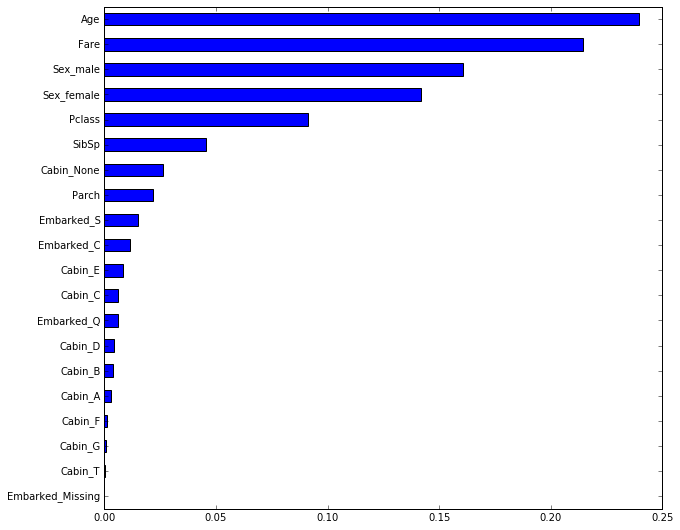

In [138]:
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(10,9));

In [139]:
del df['Cabin_T']
del df['Cabin_G']
del df['Embarked_Missing']
del df['Cabin_F']
del df['Cabin_A']

In [140]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [141]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.865723431225


In [ ]:
#Stop

In [95]:
del df['Cabin_B']
del df['Cabin_D']

In [96]:
model1 = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model1.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [98]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y, model1.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model1.oob_prediction_)

C-stat:  0.862964560764


In [99]:
del df['Embarked_Q']
del df['Cabin_C']
del df['Cabin_E']

In [100]:
model2 = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model2.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [101]:
roc = roc_auc_score(y, model2.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model2.oob_prediction_)

C-stat:  0.864985779567


In [103]:
del df['Embarked_C']

In [104]:
model3 = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model3.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [106]:
roc = roc_auc_score(y, model3.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model3.oob_prediction_)

 C-stat:  0.864935182522


In [108]:
del df['Embarked_S']

In [109]:
model4 = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model4.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [110]:
roc = roc_auc_score(y, model4.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model4.oob_prediction_)

C-stat:  0.853801169591


In [111]:
del df['Parch']

In [113]:
model5 = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model5.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [114]:
roc = roc_auc_score(y, model5.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model5.oob_prediction_)

C-stat:  0.856621289106


In [115]:
del df['Cabin_None']

In [116]:
model6 = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model6.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [117]:
roc = roc_auc_score(y, model6.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model6.oob_prediction_)

C-stat:  0.856128633667


In [118]:
del df['SibSp']

In [119]:
model7 = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model7.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [120]:
roc = roc_auc_score(y, model7.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model7.oob_prediction_)

C-stat:  0.854919630588


### I took the first model i.e., 'model' . AUC:  0.865723431225

30 trees
C-stat:  0.8549329456

50 trees
C-stat:  0.862975212774

100 trees
C-stat:  0.865723431225

200 trees
C-stat:  0.863435912185

500 trees
C-stat:  0.863462542209

1000 trees
C-stat:  0.863270806038

2000 trees
C-stat:  0.863166948945



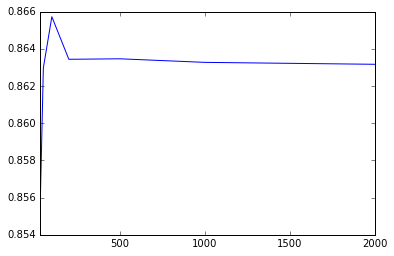

In [142]:

results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model1 = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model1.fit(df, y)
    print trees, "trees"
    roc = roc_auc_score(y, model1.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();                         

auto option
C-stat:  0.863270806038

None option
C-stat:  0.863270806038

sqrt option
C-stat:  0.862503861353

log2 option
C-stat:  0.862503861353

0.9 option
C-stat:  0.86381139552

0.2 option
C-stat:  0.862503861353



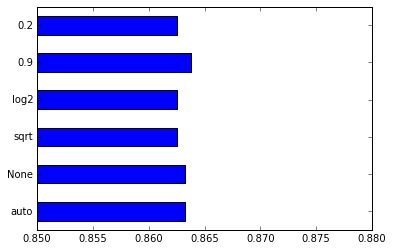

In [144]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model1 = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model1.fit(df, y)
    print max_features, "option"
    roc = roc_auc_score(y, model1.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  0.863270806038

2 min samples
C-stat:  0.869126748261

3 min samples
C-stat:  0.871012153943

4 min samples
C-stat:  0.87347543114

5 min samples
C-stat:  0.874492698047

6 min samples
C-stat:  0.873965423577

7 min samples
C-stat:  0.873400867074

8 min samples
C-stat:  0.871856325696

9 min samples
C-stat:  0.869438319539

10 min samples
C-stat:  0.86738780771



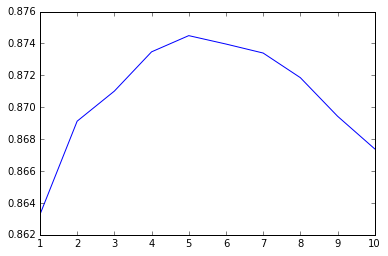

In [145]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model1 = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model1.fit(df, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model1.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [179]:
model1 = RandomForestRegressor(n_estimators=100, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.9, 
                              min_samples_leaf=5)
model1.fit(df, y)
roc = roc_auc_score(y, model1.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.871523450399


Using the values from there aren't really improving the model. Let's try some other values. 

In [148]:
model1 = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.9, 
                              min_samples_leaf=5)
model1.fit(df, y)
roc = roc_auc_score(y, model1.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.874274331853


In [149]:
model1 = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="log2", 
                              min_samples_leaf=5)
model1.fit(df, y)
roc = roc_auc_score(y, model1.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.867638129933


In [160]:
model1 = RandomForestRegressor(n_estimators=2000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.9, 
                              min_samples_leaf=5)
model1.fit(df, y)
roc = roc_auc_score(y, model1.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.874482046038


## AUC: 0.874482046038.

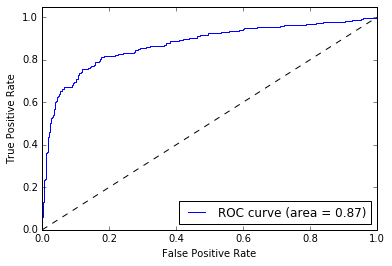

In [161]:
#Lets plot model score to understand the area under the curve
fpr, tpr, thresholds= roc_curve(y, model1.oob_prediction_)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [177]:
model1 = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model1.fit(df, y)
roc = roc_auc_score(y, model1.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.874492698047


## AUC:  0.874492698047

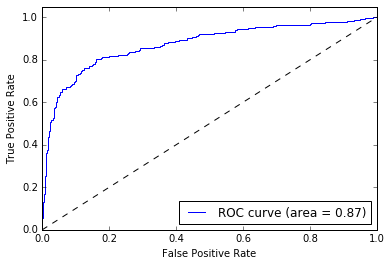

In [178]:
#Lets plot model score to understand the area under the curve
fpr, tpr, thresholds= roc_curve(y, model1.oob_prediction_)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()